# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\Stepwise Regression\stepwise_regression_dataset.csv")

### Explore the Data

In [3]:
df.head()

,Age,Experience,Education_Level,Hours_Per_Week,Certifications,Projects,Salary
0,58,44,2,35,5,4,109809
1,48,31,4,31,2,2,76416
2,34,16,3,46,2,2,57051
3,27,8,4,34,1,1,46508
4,40,26,1,54,1,4,71937


### Check the total number of Rows and Columns

In [4]:
df.shape

(500, 7)

### Check the Null Values

In [5]:
df.isnull().sum()

Age                0
Experience         0
Education_Level    0
Hours_Per_Week     0
Certifications     0
Projects           0
Salary             0
dtype: int64

### Check Inofrmation about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              500 non-null    int64
 1   Experience       500 non-null    int64
 2   Education_Level  500 non-null    int64
 3   Hours_Per_Week   500 non-null    int64
 4   Certifications   500 non-null    int64
 5   Projects         500 non-null    int64
 6   Salary           500 non-null    int64
dtypes: int64(7)
memory usage: 27.5 KB


### Check the Stastistical Summary of the data

In [7]:
df.describe()

,Age,Experience,Education_Level,Hours_Per_Week,Certifications,Projects,Salary
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.436000,23.47000,2.470000,44.738000,2.536000,4.986000,70977.452000
std,11.656142,11.95705,1.107951,8.762586,1.715398,2.522405,20312.338197
min,20.000000,0.00000,1.000000,30.000000,0.000000,1.000000,15654.000000
25%,31.000000,14.00000,1.000000,37.000000,1.000000,3.000000,55518.500000
50%,42.000000,26.00000,2.000000,44.500000,3.000000,5.000000,73160.000000
75%,51.000000,33.00000,3.000000,53.000000,4.000000,7.000000,85700.500000
max,59.000000,45.00000,4.000000,59.000000,5.000000,9.000000,114309.000000


### Check the outlier in data with the boxplot

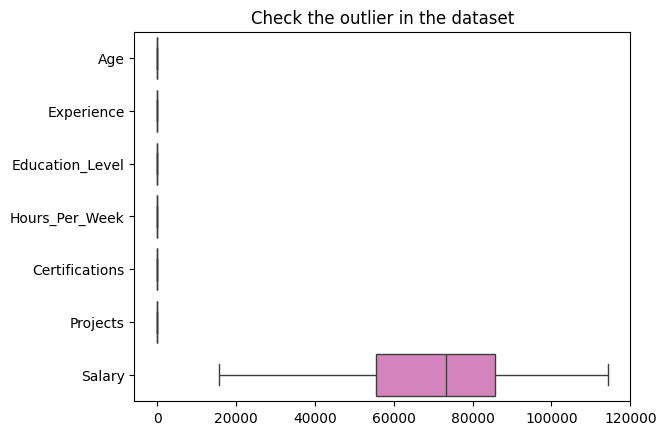

In [8]:
sns.boxplot(data=df,orient='h')
plt.title("Check the outlier in the dataset")
plt.show()

### Check the relationship between the columns through pairplot 

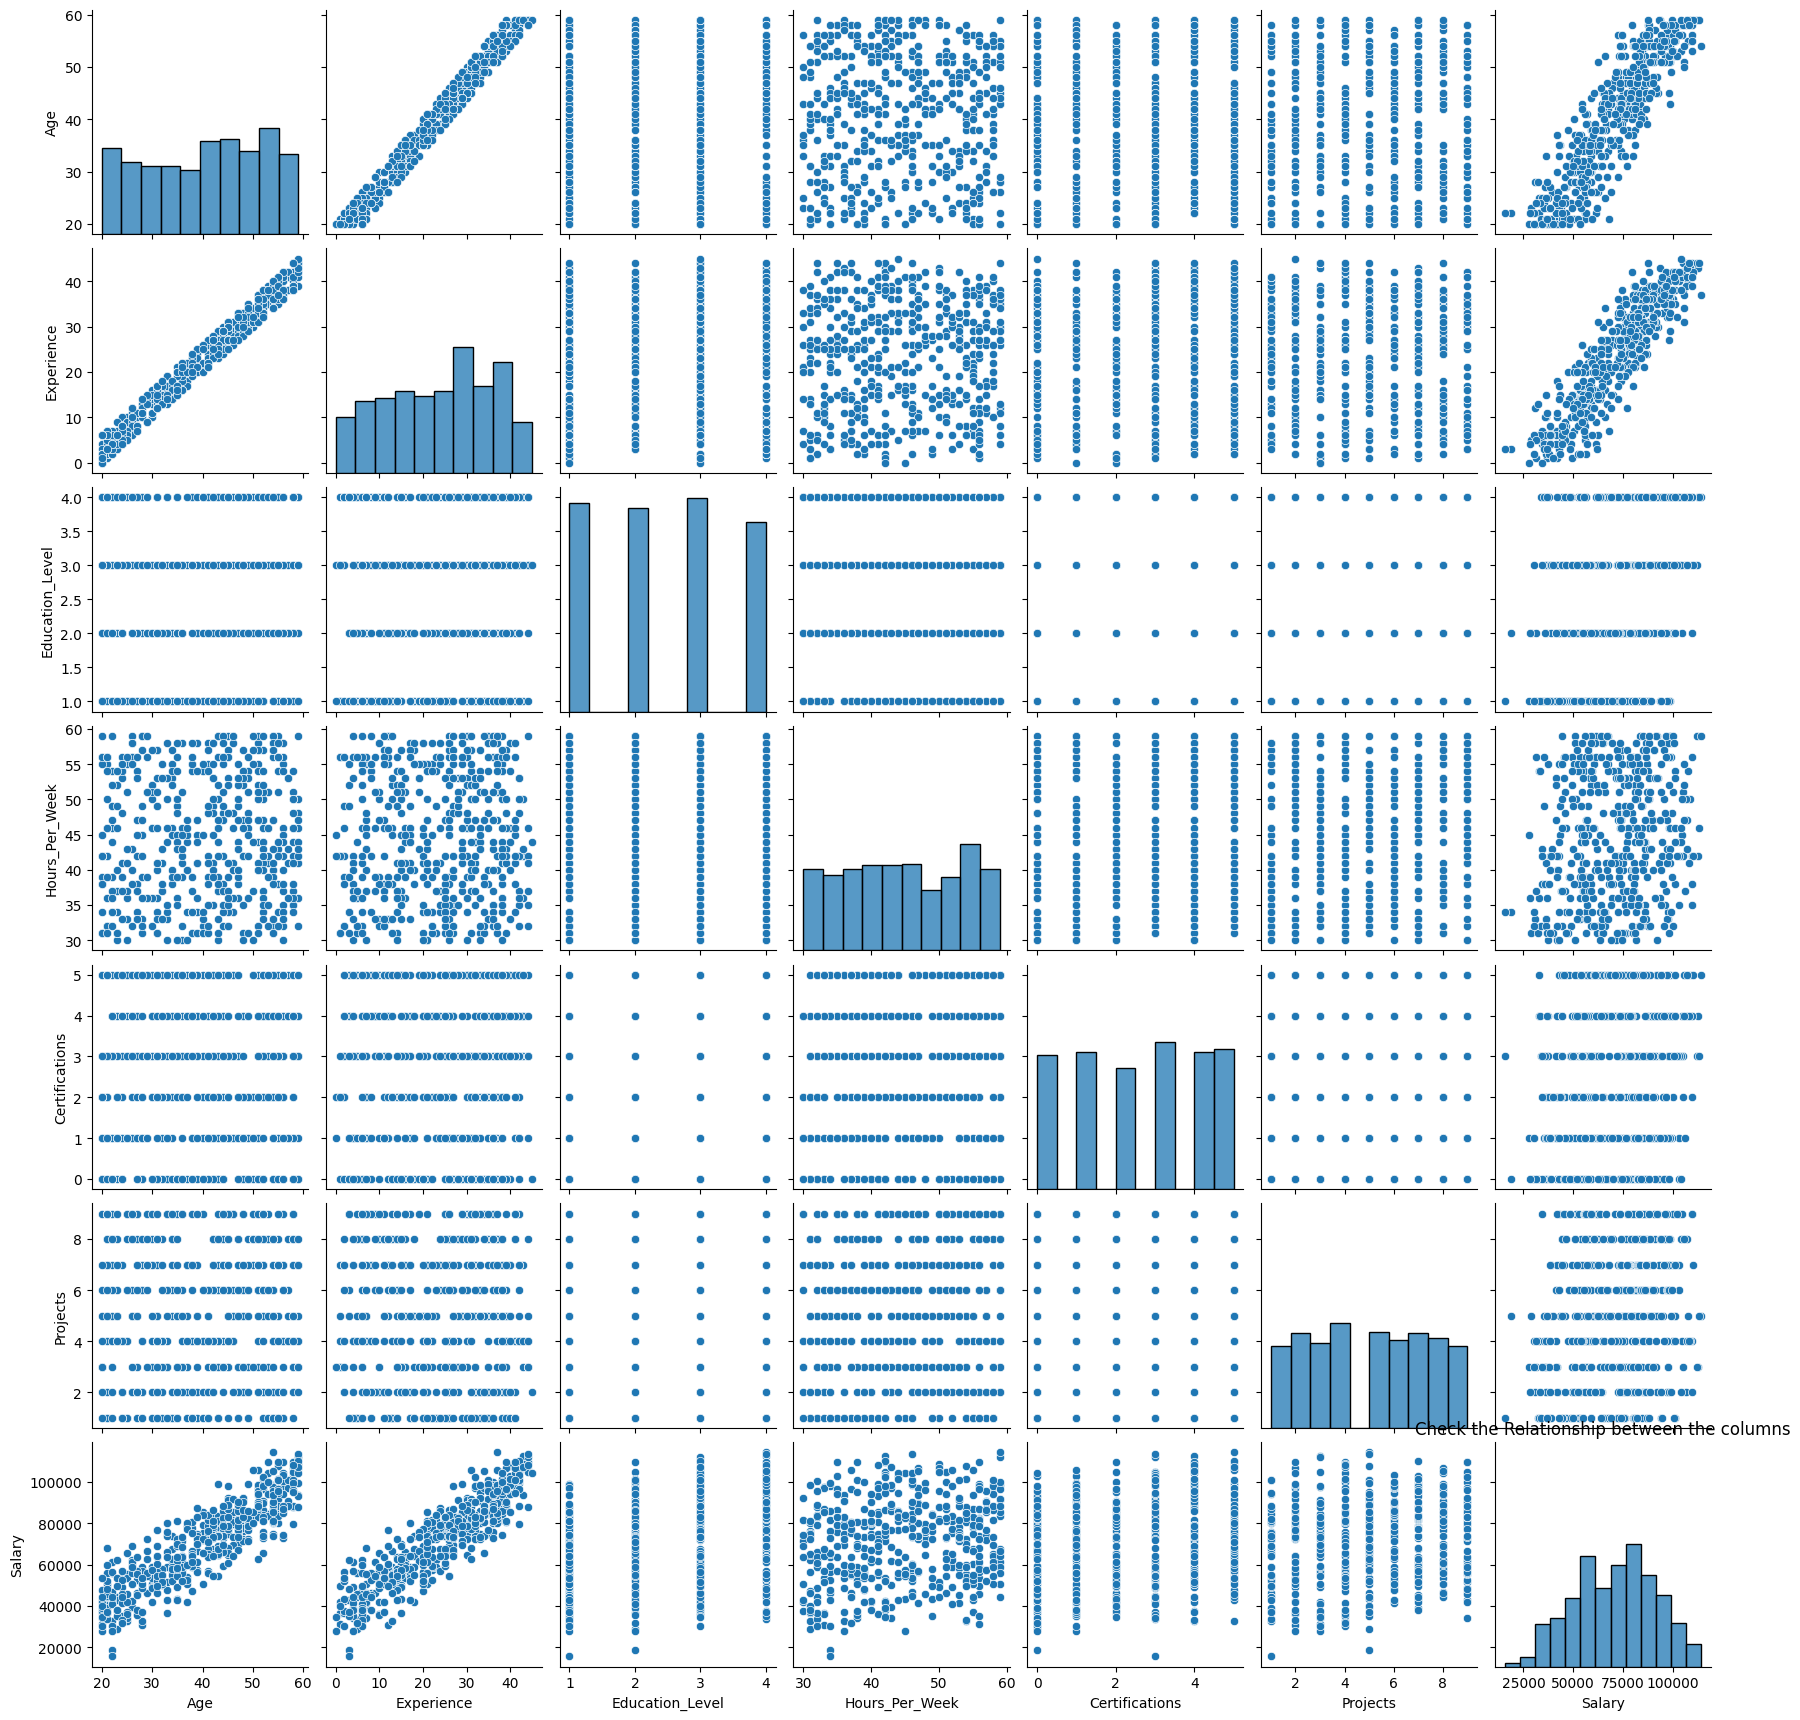

In [9]:
sns.pairplot(data=df)
plt.title("Check the Relationship between the columns")
plt.show()

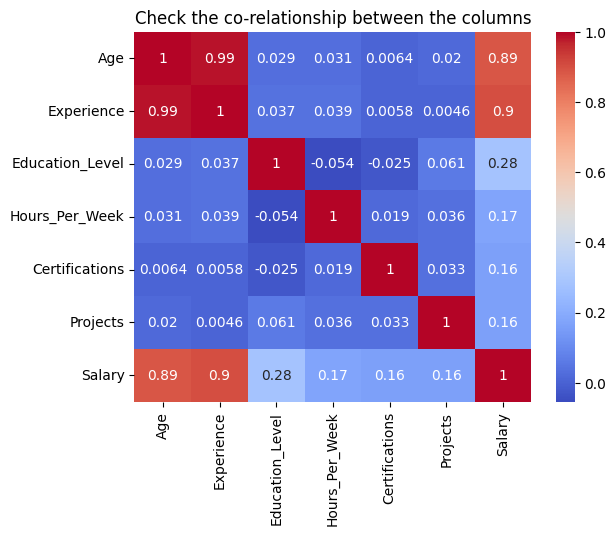

In [10]:
sns.heatmap(df.corr(),annot=True , cmap='coolwarm')
plt.title("Check the co-relationship between the columns")
plt.show()

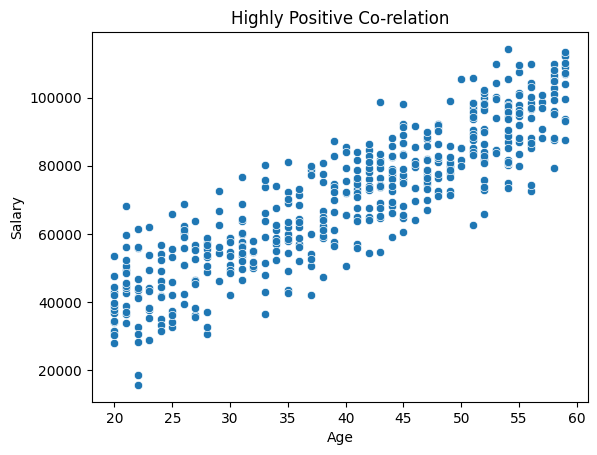

In [11]:
sns.scatterplot(x="Age",y="Salary",data=df)
plt.title("Highly Positive Co-relation")
plt.show()

### Split the data in x and y (Dependent & Independent Variable)

In [12]:
x = df.iloc[:,:-1]
y = df[["Salary"]]

### Import Train Test Split From sklearn module model_selection for spliting the data in Training and Testing 

In [13]:
from sklearn.model_selection import train_test_split

### Split the data in traning and testing 

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Import Machine Learning Model LinearRegression from sklearn module Linear Model

In [15]:
from sklearn.linear_model import LinearRegression

### Store the model in lr variable

In [16]:
lr= LinearRegression()

### Sequential Feature Selector (SFS) using mlxtend

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Applying Sequential Feature Selector (SFS) with R² Scoring

### **This is Forward+Stepwise Regression**

In [18]:
sfs = SFS(lr,k_features="best", forward=True, floating=False,scoring="r2",cv=5)  

### Fitting Sequential Feature Selector on Training Data

In [19]:
sfs.fit(x_train,y_train)

,estimator,LinearRegression()
,k_features,"(1, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


### Displaying the Selected Features

In [20]:
print("Selected Features:", sfs.k_feature_names_)

Selected Features: ('Experience', 'Education_Level', 'Hours_Per_Week', 'Certifications', 'Projects')


### Transforming the Dataset with Selected Features

In [21]:
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

### Training the Model with Selected Features

In [22]:
lr.fit(x_train_sfs, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation on Training and Testing Data

In [23]:
lr.score(x_test_sfs,y_test)*100,lr.score(x_train_sfs,y_train)*100

(94.37222823227069, 94.18215826412928)

### Transforming the Dataset with Selected Features

In [24]:
x_sfs = sfs.transform(x)

### Adding Predictions to the Dataset

In [25]:
df["Prediction"] = lr.predict(x_sfs)
df.head()

,Age,Experience,Education_Level,Hours_Per_Week,Certifications,Projects,Salary,Prediction
0,58,44,2,35,5,4,109809,100183.130085
1,48,31,4,31,2,2,76416,80396.480342
2,34,16,3,46,2,2,57051,58384.095107
3,27,8,4,34,1,1,46508,43721.153336
4,40,26,1,54,1,4,71937,67182.067590


### Importing Performance Evaluation Metrics

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Model Evaluation

We evaluate the regression model using different metrics:

- **MAE (Mean Absolute Error):** Average of absolute errors.  
- **MSE (Mean Squared Error):** Average of squared errors.  
- **RMSE (Root Mean Squared Error):** Square root of MSE, penalizes large errors more.  
- **R² Score (Coefficient of Determination):** Indicates how well the model explains the variance.



In [27]:
y_pred = lr.predict(x_test_sfs)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 3735.76
📉 MSE: 22214443.09
📉 RMSE: 4713.22
🎯 R² Score: 94.37


### Check the Performance of the model through Data Visualization 

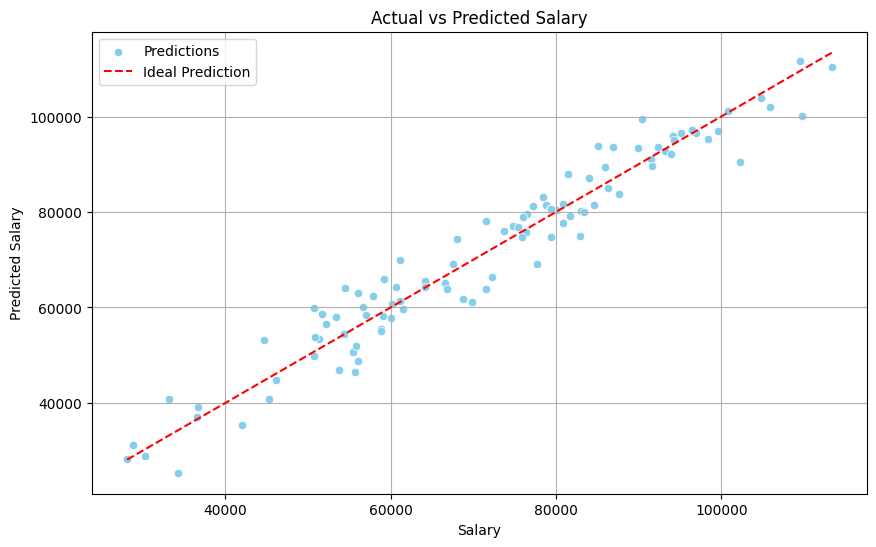

In [28]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Conclusion

In this project, we implemented a **Forward Stepwise Regression** model, a feature selection technique that incrementally adds predictors to build the most effective regression model based on performance metrics.  
The workflow included:  
- Data loading and preprocessing  
- Splitting data into training and testing sets  
- Applying Forward Stepwise Feature Selection  
- Training the Linear Regression model on selected features  
- Evaluation using MAE, MSE, RMSE, and R² Score  

**Model Performance (Test Set):**
- 📉 MAE: 3,735.76  
- 📉 MSE: 22,214,443.09  
- 📉 RMSE: 4,713.22  
- 🎯 R² Score: 94.37%  

These results demonstrate **strong predictive accuracy** with minimal overfitting, as training R² (94.18%) and testing R² (94.37%) are closely aligned.  
The Forward Stepwise approach successfully identified a compact, interpretable subset of features that explain a high proportion of variance in Salary, reducing complexity without sacrificing performance.  

Future improvements could include adding residual diagnostics, testing with backward or floating stepwise methods, and comparing against a full-feature regression model to validate the gains from feature selection.  
